<a href="https://colab.research.google.com/github/jianlgler/IST_labiagi/blob/main/PyTorch_AdaIN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset

from tqdm.notebook import tqdm
from google.colab import drive
import numpy as np
import os
import sys

Instance Normalization normalizza l'input su un singolo stile specifico. Qui si propone la Adaptive Instance Normalization, dove stile e contenuto sono parametrici. Notare che non ci sono parametri learnable, la funzione stessa li computa dallo style input.

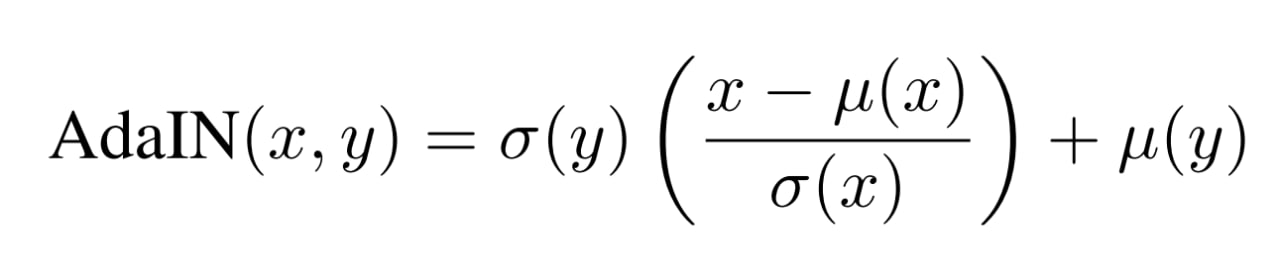

In [ ]:
def calc_mean_std(input, eps=1e-5):
  assert (len(input.size) == 4)

  batch_size, channels = input.shape[:2]

  reshaped = input.view(batch_size, channels, -1) # Reshape channel wise
  mean = torch.mean(reshaped, dim = 2).view(batch_size, channels, 1, 1) # Calculat mean and reshape
  std = torch.sqrt(torch.var(reshaped, dim=2)+eps).view(batch_size, channels, 1, 1) # Calculate variance, add epsilon (avoid 0 division),
                                                                                    # calculate std and reshape
  return mean, std

def ada_in(content_features, style_features):
  assert content_features.shape[:2] == style_features.shape[:2] # Only first two dim, such that different image sizes is possible

  style_mean, style_std = calc_mean_std(style_features)
  content_mean, content_std = calc_mean_std(content_features)

  output = style_std*((content_features - content_mean) / (content_std)) + style_mean
